In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Set font for Matplotlib
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [3]:
# Load data
raw_data = pd.read_excel("./data/231222_최종.xlsx")

raw_data.columns = ["ID", "Attendance", "Level", "Quater_paid", "Combatpower", "dungeonplay"]

In [4]:
# Fill missing values
raw_data.fillna(0, inplace = True)

In [5]:
# Check for missing values
raw_data.isnull().sum()

ID             0
Attendance     0
Level          0
Quater_paid    0
Combatpower    0
dungeonplay    0
dtype: int64

In [6]:
# Check data dimensions
raw_data.shape

,ID,Attendance,Level,Quater_paid,Combatpower,dungeonplay
0,1,9,0.0,9000.0,71066.0,0.0
1,2,1,0.0,0.0,0.0,0.0
2,3,3,221.0,0.0,3280363.0,0.0
3,4,1,0.0,0.0,1703.0,0.0
4,5,1,0.0,0.0,5718.0,3.0


In [7]:
# Check data dimensions
raw_data.shape

(41708, 6)

In [8]:
# 데이터프레임 데이터 타입 확인
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41708 entries, 0 to 41707
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           41708 non-null  int64  
 1   Attendance   41708 non-null  int64  
 2   Level        41708 non-null  float64
 3   Quater_paid  41708 non-null  float64
 4   Combatpower  41708 non-null  float64
 5   dungeonplay  41708 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.9 MB


In [9]:
# Remove columns where the level is -1
cond2 = (raw_data["Level"] != -1)

data = raw_data[cond2]

In [10]:
data.shape

(40454, 6)

In [11]:
# Define three columns
Attendance = np.array(data["Attendance"])
Level = np.array(data["Level"])
Quater_paid = np.array(data["Quater_paid"])
Combatpower = np.array(data["Combatpower"])
dungeonplay = np.array(data["dungeonplay"])

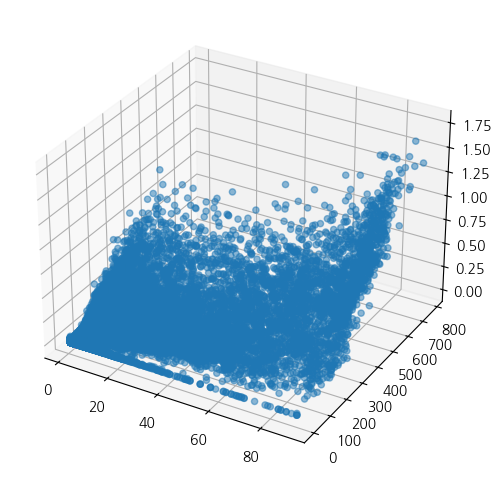

In [12]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Attendance, Level, Combatpower, s=20, alpha=0.5)

plt.show()

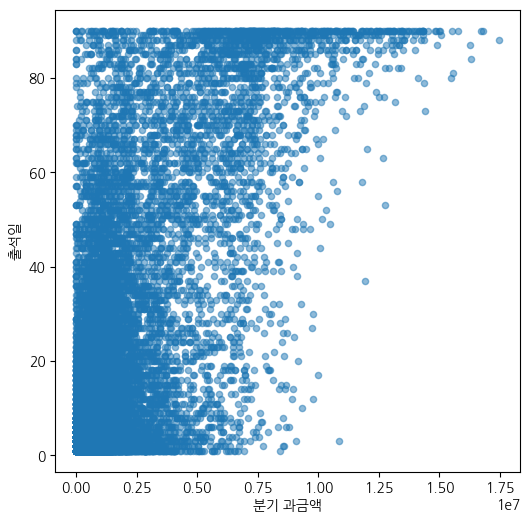

In [13]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(Combatpower, Attendance, s=20, alpha=0.5)
plt.xlabel("분기 과금액")
plt.ylabel("출석일")
plt.show()

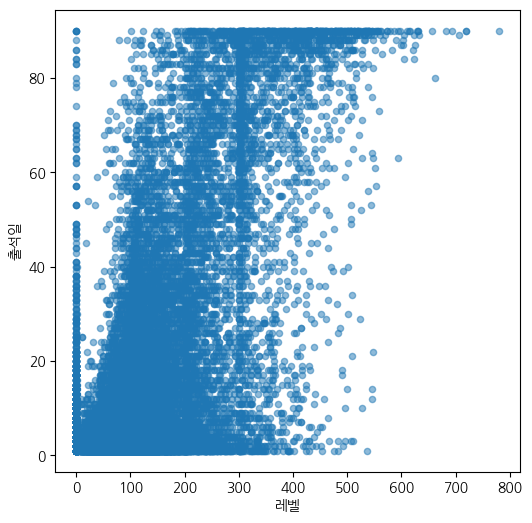

In [14]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(Level, Attendance, s=20, alpha=0.5)
plt.xlabel("레벨")
plt.ylabel("출석일")
plt.show()

Clustering

In [15]:
ml_data = data[["Level", "Attendance", "Combatpower"]]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# 군집 개수
K = 3

# 모델 정의
model = MiniBatchKMeans(n_clusters=K, random_state=1)

model.fit(ml_data)
ml_data["Cluster"] = model.fit_predict(ml_data)

In [17]:
centers = model.cluster_centers_

In [18]:
clustered_0_level = ml_data[ml_data["Cluster"] == 0]["Level"]
clustered_0_attendance = ml_data[ml_data["Cluster"] == 0]["Attendance"]
clustered_0_combatpower = ml_data[ml_data["Cluster"] == 0]["Combatpower"]
clustered_0 = pd.DataFrame({"Level":clustered_0_level, "Attendance":clustered_0_attendance, "Combatpower":clustered_0_combatpower, "Cluster":0}).reset_index(drop=True)

clustered_1_level = ml_data[ml_data["Cluster"] == 1]["Level"]
clustered_1_attendance = ml_data[ml_data["Cluster"] == 1]["Attendance"]
clustered_1_combatpower = ml_data[ml_data["Cluster"] == 1]["Combatpower"]
clustered_1 = pd.DataFrame({"Level":clustered_1_level, "Attendance":clustered_1_attendance, "Combatpower":clustered_1_combatpower, "Cluster":1}).reset_index(drop=True)

clustered_2_level = ml_data[ml_data["Cluster"] == 2]["Level"]
clustered_2_attendance = ml_data[ml_data["Cluster"] == 2]["Attendance"]
clustered_2_combatpower = ml_data[ml_data["Cluster"] == 2]["Combatpower"]
clustered_2 = pd.DataFrame({"Level":clustered_2_level, "Attendance":clustered_2_attendance, "Combatpower":clustered_2_combatpower, "Cluster":2}).reset_index(drop=True)

clustered_data = pd.concat([clustered_0, clustered_1, clustered_2], axis = 0)

In [ ]:
from plotly.offline import plot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

fig = px.scatter_3d(clustered_data,
                    x='Level',
                    y='Attendance',
                    z='Combatpower',
                    color='Cluster')

data = go.Scatter3d(
    x=clustered_data[:,0],
    y=clustered_data[:,1],
    z=clustered_data[:,2],
    text = ['point #{}'.format(i) for i in range(X.shape[0])],
    mode='markers',
    marker=dict(
        size=3,
        color=color,
        colorscale='Jet',
        line=dict(
            #color='rgba(217, 217, 217, 0.14)',
            #color='rgb(217, 217, 217)',
            width=0.0
        ),
        opacity=0.8
    )
)


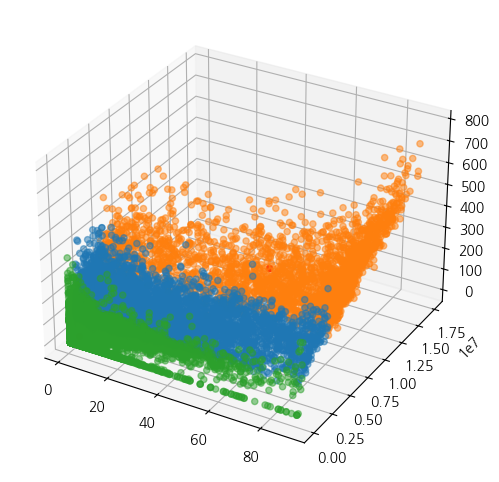

In [25]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clustered_0_attendance, clustered_0_combatpower, clustered_0_level, s=20, alpha=0.5)
ax.scatter(clustered_1_attendance, clustered_1_combatpower, clustered_1_level, s=20, alpha=0.5)
ax.scatter(clustered_2_attendance, clustered_2_combatpower, clustered_2_level, s=20, alpha=0.5)

for idx in range(len(centers)):
    ax.scatter(centers[idx][1], centers[idx][2], centers[idx][0], color = "red")

plt.show()

In [27]:
centers

array([[1.49533567e+02, 2.04543972e+01, 1.38790405e+06],
       [3.46844361e+02, 6.00515941e+01, 6.67284445e+06],
       [3.50947096e+01, 4.15441849e+00, 1.48348578e+05]])

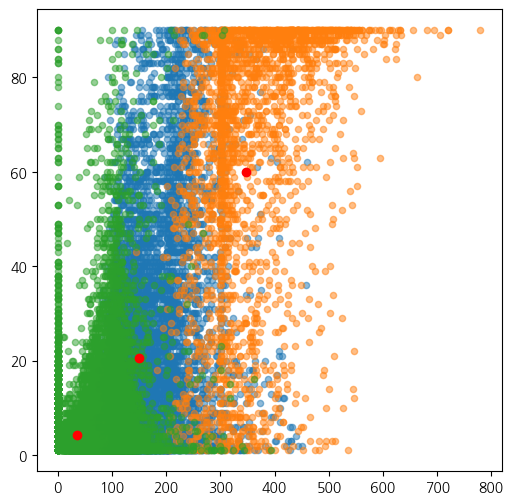

In [23]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(clustered_0_level, clustered_0_attendance, s=20, alpha=0.5)
ax.scatter(clustered_1_level, clustered_1_attendance, s=20, alpha=0.5)
ax.scatter(clustered_2_level, clustered_2_attendance, s=20, alpha=0.5)


for idx in range(len(centers)):
    ax.scatter(centers[idx][0], centers[idx][1], marker='o', color = "red")

plt.show()

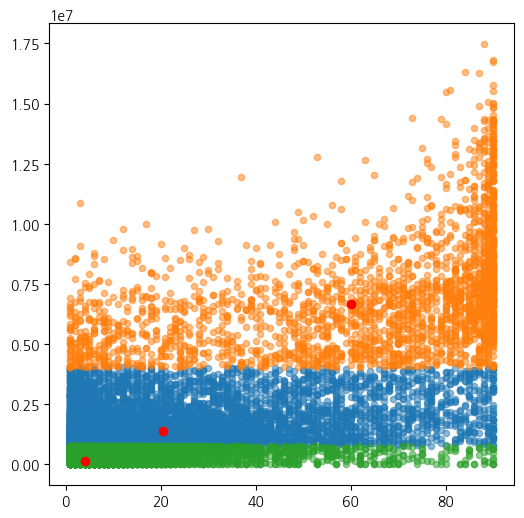

In [36]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(clustered_0_attendance, clustered_0_combatpower, s=20, alpha=0.5)
ax.scatter(clustered_1_attendance, clustered_1_combatpower, s=20, alpha=0.5)
ax.scatter(clustered_2_attendance, clustered_2_combatpower, s=20, alpha=0.5)


for idx in range(len(centers)):
    ax.scatter(centers[idx][1], centers[idx][2], marker='o', color = "red")

plt.show()

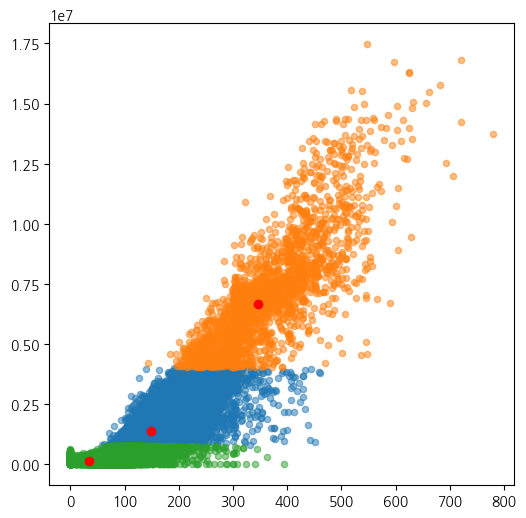

In [21]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(clustered_0_level, clustered_0_combatpower, s=20, alpha=0.5)
ax.scatter(clustered_1_level, clustered_1_combatpower, s=20, alpha=0.5)
ax.scatter(clustered_2_level, clustered_2_combatpower, s=20, alpha=0.5)


for idx in range(len(centers)):
    ax.scatter(centers[idx][0], centers[idx][2], marker='o', color = "red")

plt.show()